In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
import matplotlib.pyplot as plt

from gym_microrts import microrts_ai
from gym_microrts.envs.vec_env import MicroRTSGridModeVecEnv

from llm.nashor import Nashor
import llm.prompts as prompts

from gus.utils import save_video


# Game Lifecycle

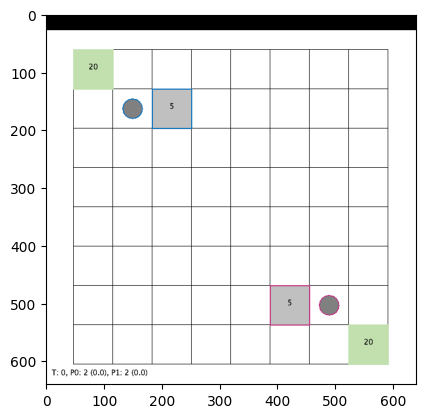

In [19]:
max_steps = 500
map_size = 8
no_action = np.zeros((1, map_size*map_size, 78))

envs = MicroRTSGridModeVecEnv(
    num_selfplay_envs=0,
    num_bot_envs=1,
    max_steps=max_steps,
    render_theme=2,
    ai2s=[microrts_ai.passiveAI for _ in range(1)],
    # ai2s=[microrts_ai.randomAI for _ in range(1)],
    # ai2s=[microrts_ai.naiveMCTSAI for _ in range(1)],
    # ai2s=[microrts_ai.coacAI for _ in range(1)],
    # map_paths=["maps/4x4/base4x4.xml"],
    map_paths=["maps/8x8/basesWorkers8x8.xml"],
    # map_paths=["maps/8x8/melee8x8Mixed7.xml"],
    reward_weight=np.array([10.0, 1.0, 1.0, 0.2, 1.0, 4.0]),
)
response = envs.reset()
action_mask = envs.get_action_mask()
img = envs.render(mode='rgb_array')
plt.imshow(img)

exp_name = 'exp_basesWorkers8x8_passiveAI_500_gemma7b_listRandom'
nashor = Nashor(
    map_size=map_size, 
    log_file_name=exp_name + ".log",
    prompt_function=prompts.list_random,
    llm='gemma:7b',
)

In [20]:
images = []
action = no_action
for t in range(max_steps):

    if t%20 == 0 and t != 0:
        print(f"{t = }")
        action_mask = envs.get_action_mask()
        action = nashor.get_action(action_mask, response[0])
        #import pdb; pdb.set_trace()
        
    response = envs.step(action)

    img = envs.render(mode='rgb_array')
    images.append(img)    

    if response[2][0]:
        print("done")
        break

save_video(images, path=exp_name + ".mp4")

t = 20
t = 40
t = 60
t = 80
t = 100
t = 120
t = 140
t = 160
t = 180
t = 200
t = 220
t = 240
t = 260
t = 280
t = 300
t = 320
t = 340
t = 360
t = 380
t = 400
t = 420
t = 440
t = 460
t = 480
done
Video saved


In [8]:
save_video(images, path=exp_name + ".mp4")

Video saved
